# Importing Necessary Library and packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tmdb-movies-dataset/tmdb-movies.csv


# Reading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.shape

(10866, 21)

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df = df[pd.notnull(df['cast'])]
df = df[pd.notnull(df['director'])]
df = df[pd.notnull(df['genres'])] 
df['production_companies'].fillna('missing',inplace=True) #object datatype
df['tagline'].fillna('missing',inplace=True)
df['budget'].replace(0,np.nan,inplace=True)
df['revenue'].replace(0,np.nan,inplace=True)
df['runtime'].replace(0,np.nan,inplace=True)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Data Visualization

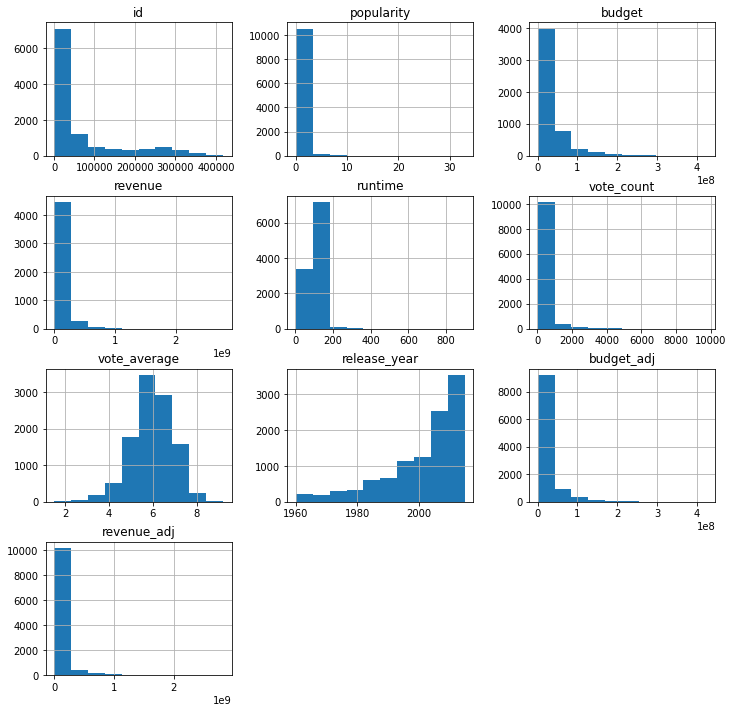

In [12]:
df.hist(figsize=(12,12));

Text(0, 0.5, 'Popularity')

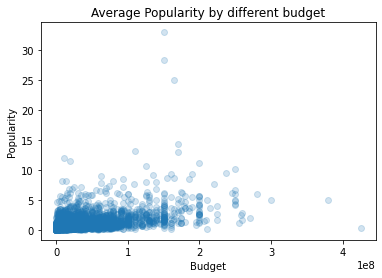

In [13]:
x = df['budget']
y = df['popularity']

plt.scatter(x,y,alpha=0.2)
plt.title('Average Popularity by different budget')
plt.xlabel('Budget')
plt.ylabel('Popularity')

In [14]:
m = df['budget'].median()
low_budget = df.query('budget < {}'.format(m))
high_budget = df.query('budget >= {}'.format(m))
mean_low_budget = low_budget['popularity'].mean()
mean_high_budget = high_budget['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

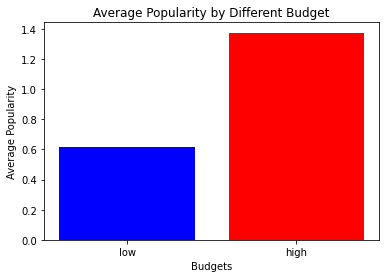

In [15]:
x = [1,2]
y = [mean_low_budget,mean_high_budget]
labels = ['low','high']
plt.bar(x, y, tick_label=labels,color=['b','r'])
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [16]:
gain = (mean_high_budget-mean_low_budget)/mean_high_budget*100
gain

55.35667547647106

In [17]:
short_m = df.query('runtime <= {}'.format(60))
medium_m = df.query('runtime <= {}'.format(120))
long_m = df.query('runtime > {}'.format(120))
mean_short_m = short_m['popularity'].mean()
mean_medium_m = medium_m['popularity'].mean()
mean_long_m = long_m['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

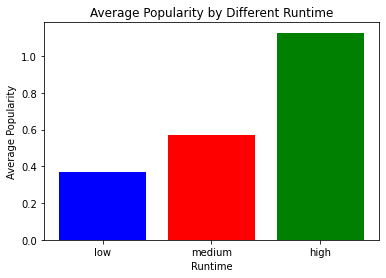

In [18]:
x = [1,2,3]
y = [mean_short_m, mean_medium_m, mean_long_m]
labels=['low','medium','high']
plt.bar(x, y, tick_label = labels, color=['b','r','g'])
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='runtime', ylabel='popularity'>

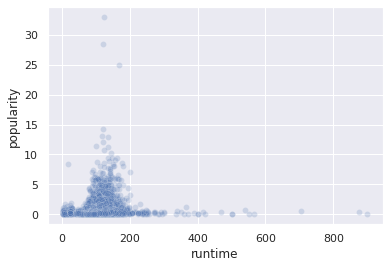

In [19]:
sns.set()
sns.scatterplot(df['runtime'], df['popularity'],alpha=0.2)

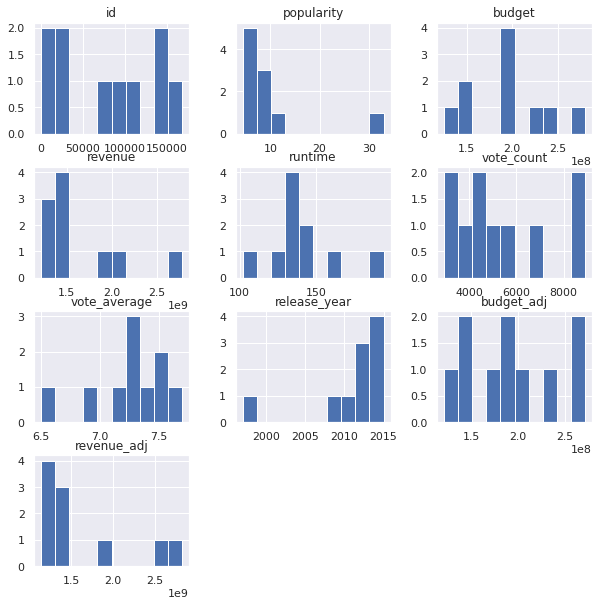

In [20]:
top10_rev = df.nlargest(10,'revenue')
top10_rev.hist(figsize=(10,10));

In [21]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10731, dtype: object

In [22]:
data = pd.Series(df['genres'].str.cat(sep='|').split('|'))
count = data.value_counts(ascending=False)
df_genre_counts = pd.DataFrame({'genres':count.index, 'count':count.values})

In [23]:
df_genre_counts

,genres,count
0,Drama,4746
1,Comedy,3775
2,Thriller,2902
3,Action,2376
4,Romance,1708
5,Horror,1636
6,Adventure,1465
7,Crime,1353
8,Science Fiction,1221
9,Family,1214


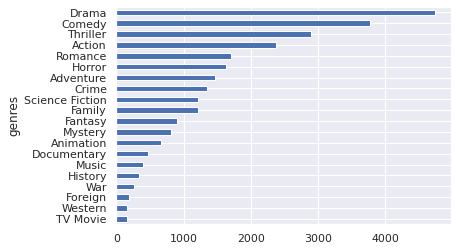

In [24]:
x = df_genre_counts.groupby('genres')['count'].mean().sort_values()
x.plot(kind='barh');

<AxesSubplot:title={'center':'Number of Movies Released In Year'}, xlabel='year', ylabel='number of movies'>

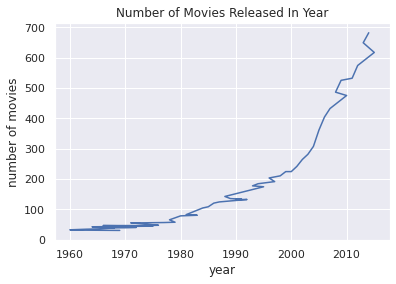

In [25]:
movie_count = df['release_year'].value_counts()
movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released In Year')